In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [10]:
top_tiktokers = pd.read_csv('top-250-tiktokers.csv')
top_tiktokers.head()

,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9m,38.3m,6.1m,16.60%,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7m,13.8m,2.8m,20.80%,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3m,17.6m,2.8m,16%,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3m,3.2m,622.6k,19.70%,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
4,5,@tiktok,U.S.A,45.3m,9.4m,503.0k,5.60%,1,NaN,NaN,NaN,1.0,NaN,NaN


In [11]:
top_tiktokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           256 non-null    int64  
 1   Username       256 non-null    object 
 2   Country        256 non-null    object 
 3   Followers      256 non-null    object 
 4   Views          256 non-null    object 
 5   Likes          256 non-null    object 
 6   Engagement     256 non-null    object 
 7   Brand Account  256 non-null    int64  
 8   Gender         232 non-null    object 
 9   Age            225 non-null    float64
 10  Ethnicity      242 non-null    object 
 11  Famous         255 non-null    float64
 12  Genre          254 non-null    object 
 13  LGBTQ          239 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 28.1+ KB


In [12]:
top_tiktokers.columns

Index(['Rank', 'Username', 'Country', 'Followers', 'Views', 'Likes',
       'Engagement', 'Brand Account', 'Gender', 'Age', 'Ethnicity', 'Famous',
       'Genre', 'LGBTQ'],
      dtype='object')

In [13]:
top_tiktokers['Followers'] = top_tiktokers['Followers'].astype(str).str.replace('m', '')
top_tiktokers['Followers'] = top_tiktokers['Followers'].astype(float)
top_tiktokers['Views'] = top_tiktokers['Views'].astype(str).str.replace('m', '')
top_tiktokers['Views'] = top_tiktokers['Views'].astype(str).str.replace('k', '')
top_tiktokers['Views'] = top_tiktokers['Views'].astype(float)
top_tiktokers['Likes'] = top_tiktokers['Likes'].astype(str).str.replace('m', '')
top_tiktokers['Likes'] = top_tiktokers['Likes'].astype(str).str.replace('k', '')
top_tiktokers['Likes'] = top_tiktokers['Likes'].astype(float)
top_tiktokers['Engagement'] = top_tiktokers['Engagement'].astype(str).str.replace('%', '')
top_tiktokers['Engagement'] = top_tiktokers['Engagement'].astype(float)

In [39]:
#convert items to a list
def convert(string): 
    li = list(string.split(","))
    li = [x.strip(' ') for x in li]
    return li

#edit "df" to column we want to extract
genre_list = []
for i in top_tiktokers['Genre'].dropna():
    genre_list = genre_list + convert(i)
tiktok_genres = np.unique(genre_list)

#function that counts amount of each genre
def count_amount(ser, ind):
    li = []
    for i in ind:
        total = 0
        for j in ser:
            if i in j:
                total += 1
        li.append(total)
    return li

#using genre counts (change "df")
genre_counts = count_amount(top_tiktokers['Genre'].dropna(), tiktok_genres)
tiktok_genre_df = pd.Series(genre_counts, index = tiktok_genres)

In [44]:
tiktok_genre_df[tiktok_genre_df > 20].index

Index(['Acting', 'Comedy', 'Dancing', 'Lifestyle', 'Lipsyncing', 'Promotion'], dtype='object')

In [45]:
def contains(ser, word):
    li = []
    for i in ser:
        if word in i:
            li.append(True)
        else:
            li.append(False)
    return li

In [46]:
top_tiktokers_nona = top_tiktokers[(top_tiktokers['Genre'].isna()) == 0]

top_tiktokers_nona

,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9,38.3,6.1,16.6,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7,13.8,2.8,20.8,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3,17.6,2.8,16.0,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3,3.2,622.6,19.7,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
5,6,@riyaz.14,India,43.2,3.0,342.6,11.7,0,Male,17.0,South Asian,0.0,Acting,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,@ramneeksingh1313,India,8.6,479.1,31.6,6.7,0,Male,35.0,South Asian,0.0,"Comedy, Acting",0.0
252,253,@amandacerny,U.S.A,8.6,654.7,95.2,14.6,0,Female,29.0,White,1.0,"Comedy, Lifestyle",0.0
253,254,@rahimabram,Russia,8.6,1.6,271.2,17.0,0,Male,22.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0
254,255,@johnnyorlando,U.S.A,8.6,1.1,245.4,22.7,0,Male,17.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0


In [48]:
#creating a dateframe with repeats of a tiktoker that falls into multiple genre categories, so we can plot catplots
genres_of_tokers_df = pd.DataFrame(columns = ['Country','Followers','Views','Likes','Gender','Ethnicity','Genre'])
    
for genre in tiktok_genre_df[tiktok_genre_df > 30].index:
    for index, row in top_tiktokers_nona[contains(top_tiktokers_nona['Genre'], genre)].iterrows():
        genres_of_tokers_df = genres_of_tokers_df.append({'Country' : row['Country'],
                                                         'Followers': row['Followers'], 
                                                          'Views': row['Views'],
                                                         'Likes': row['Likes'],
                                                         'Gender': row['Gender'],
                                                          'Age': row['Age'],
                                                         'Ethnicity': row['Ethnicity'],
                                                         'Genre': genre}, ignore_index=True)

In [49]:
genres_of_tokers_df

,Country,Followers,Views,Likes,Gender,Ethnicity,Genre,Age
0,India,43.2,3.0,342.6,Male,South Asian,Acting,17.0
1,U.S.A,31.3,9.0,1.6,Male,White,Acting,22.0
2,India,28.4,2.2,285.5,Female,South Asian,Acting,17.0
3,India,28.0,12.8,553.0,Female,South Asian,Acting,23.0
4,India,25.9,1.5,192.2,Male,South Asian,Acting,27.0
...,...,...,...,...,...,...,...,...
419,India,8.8,3.9,346.2,Female,South Asian,Promotion,29.0
420,U.S.A,8.8,9.8,1.4,Female,Latinx,Promotion,23.0
421,India,8.8,640.6,29.6,Male,South Asian,Promotion,48.0
422,Russia,8.6,1.6,271.2,Male,White,Promotion,22.0


In [52]:
#lessen burden on piechart by grouping all smaller categories into an 'Other' index
def group_lower_ranking_values(rating_counts, amt):
    other = 0
    for i in rating_counts:
        if i < amt:
            other += i
            rating_counts = rating_counts.drop(rating_counts[rating_counts == i].index[0], axis=0)
    rating_counts['Other'] = other
    return rating_counts

<Figure size 7200x7200 with 0 Axes>

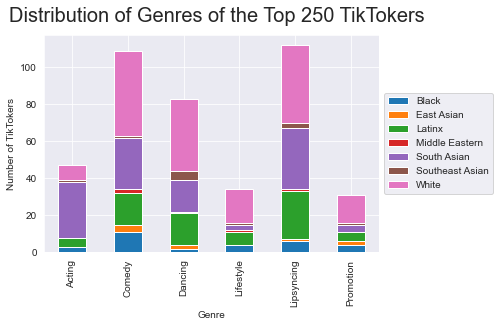

In [81]:
plt.figure(figsize=(100, 100));
genres_of_tokers_df.groupby(['Genre', 'Ethnicity']).size().unstack().plot(kind='bar', stacked=True);
plt.ylabel('Number of TikTokers');
plt.xlabel('Genre');
plt.figtext(.525,.925,'Distribution of Genres of the Top 250 TikTokers', fontsize=20, ha='center');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

In [99]:
top_tiktokers[["Famous", "Rank"]].groupby('Famous').nunique()

,Famous,Rank
Famous,,
0.0,1,130
1.0,1,125


In [105]:
top_tiktokers.groupby(['Famous', 'Gender']).size()

Famous  Gender
0.0     Female    48
        Male      73
1.0     Female    50
        Male      60
dtype: int64

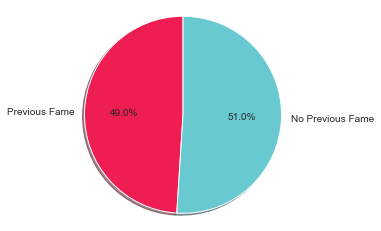

In [94]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Previous Fame', 'No Previous Fame']
sizes = [49, 51]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = ['#EE1D52','#69C9D0'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


No handles with labels found to put in legend.


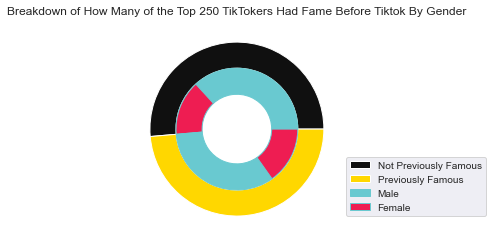

In [122]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[121., 48.], [110., 50.]])

outer_colors = ['#101010','#FFD700']
inner_colors = ['#69C9D0','#EE1D52', '#69C9D0', '#EE1D52']

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='#69C9D0'))

ax.set(aspect="equal", title='Breakdown of How Many of the Top 250 TikTokers Had Fame Before Tiktok By Gender')

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

subgroup_names_legs= ['Not Previously Famous', 'Previously Famous', 'Male', 'Female']

ax.legend(subgroup_names_legs, loc=(1.0, 0.1))

plt.show()